In [4]:
from plumber import mlpipe, mlht

import pandas as pd

df_read = pd.read_csv('mushrooms.csv')

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
y = mushroom.data.targets 

df = pd.concat([X, y], axis=1)

In [8]:
pipe = mlpipe(df=df,target_column='poisonous',test_size=0.2,random_state=1,display_analytics=True)

Dropped features with >=25% missing values: ['stalk-root']
8124 number of instances remaining.
Training Logistic Regression...
Training SVM...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training Extra Trees...
Training Gradient Boosting...
Training AdaBoost...


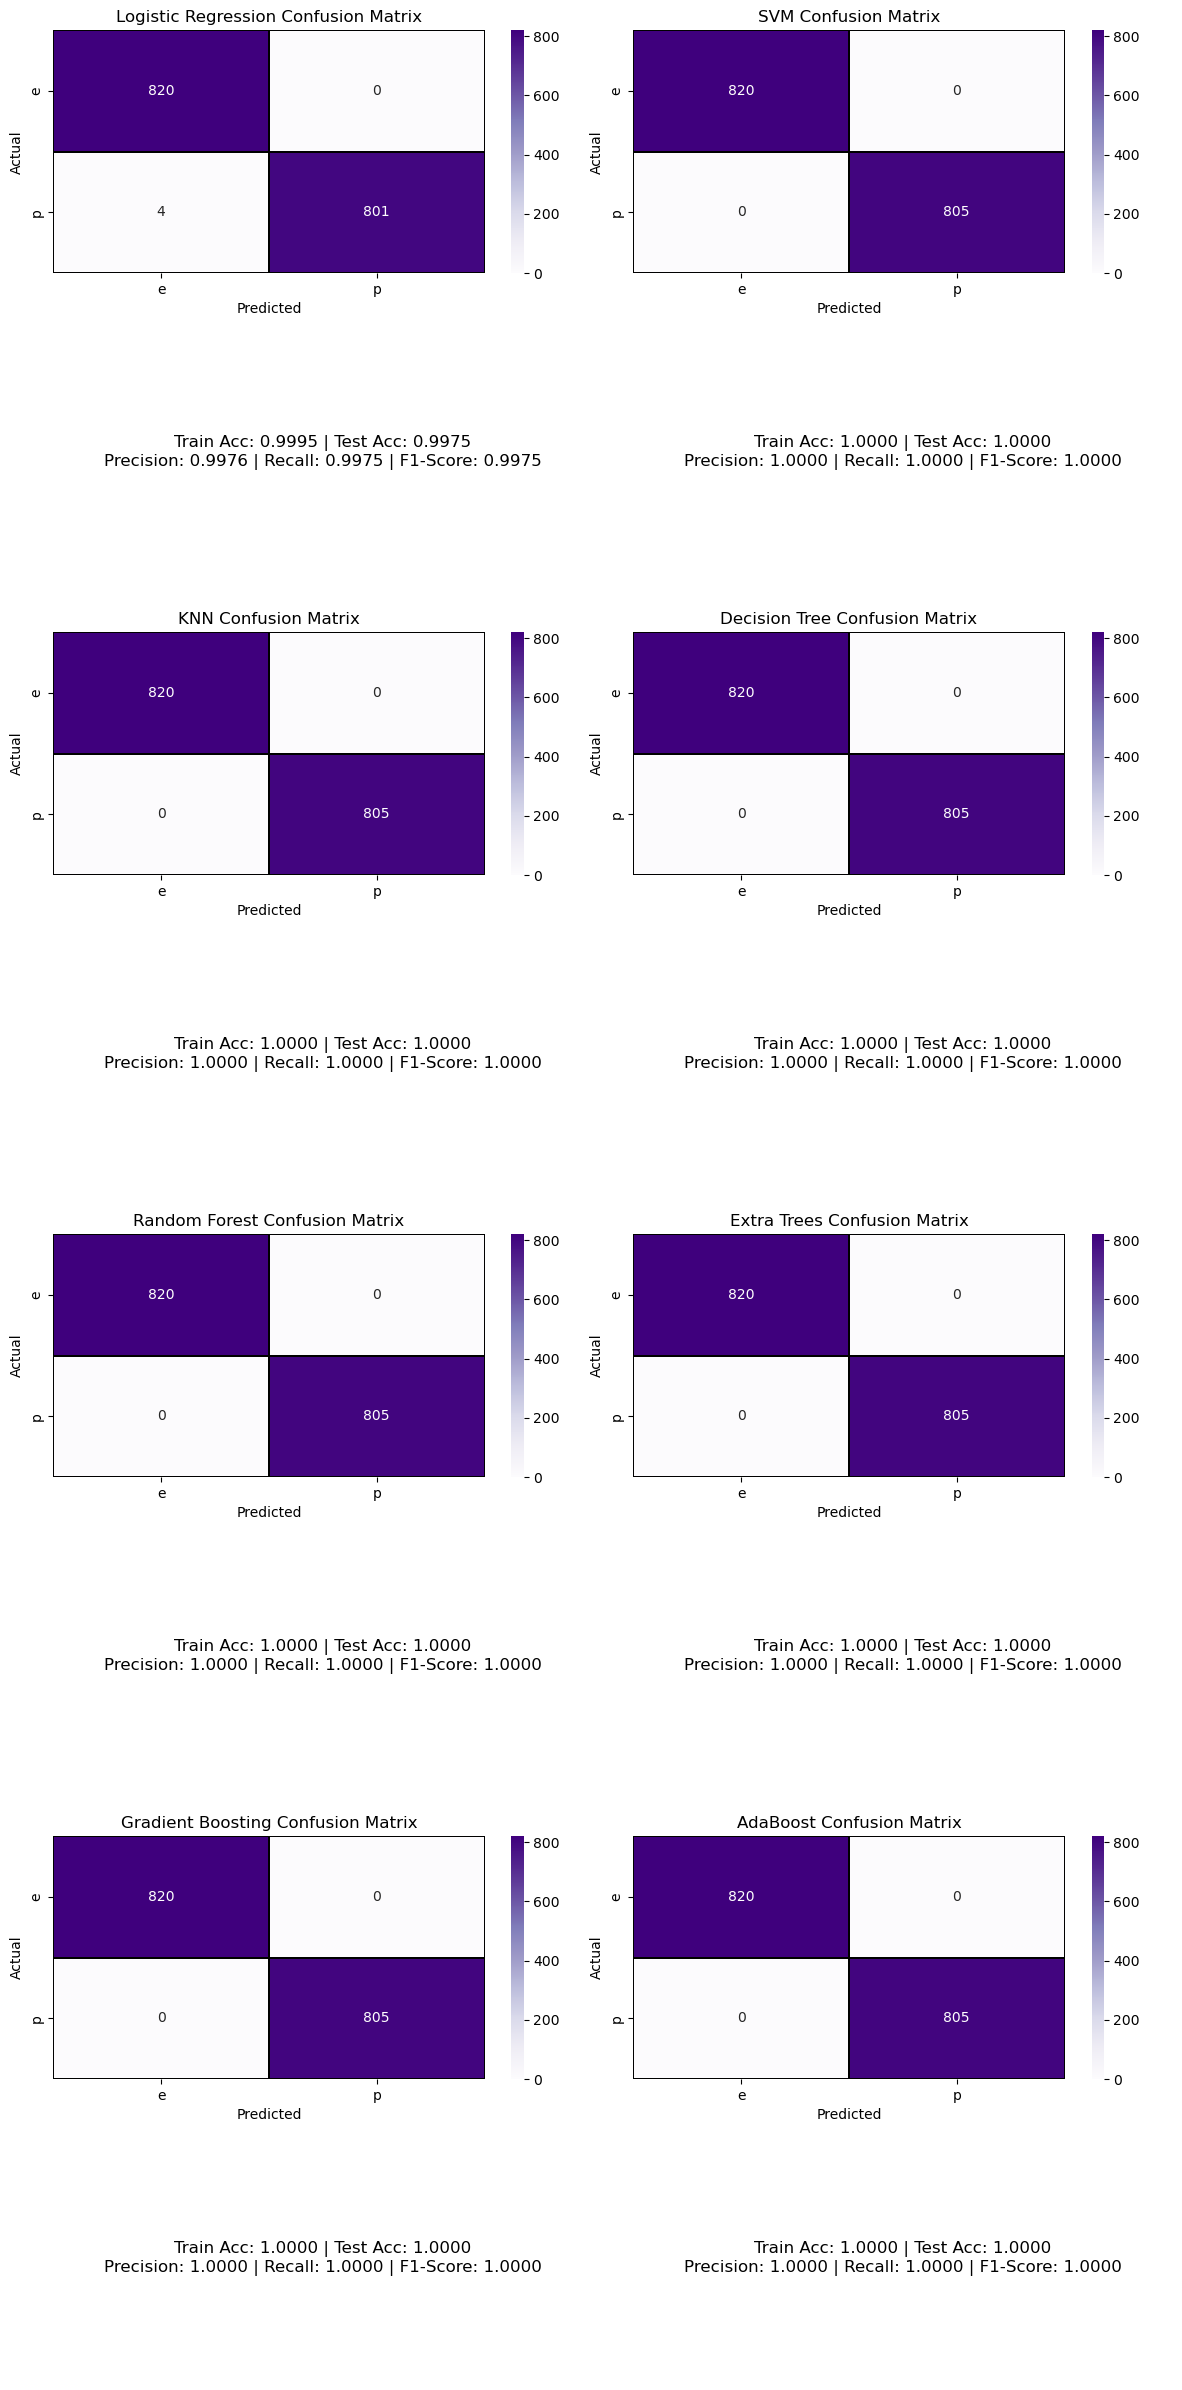

,train_accuracy,test_accuracy
Logistic Regression,0.999538,0.997538
SVM,1.0,1.0
KNN,1.0,1.0
Decision Tree,1.0,1.0
Random Forest,1.0,1.0
Extra Trees,1.0,1.0
Gradient Boosting,1.0,1.0
AdaBoost,1.0,1.0


The best model is SVM with a test accuracy of 1.0000.


In [10]:
pipe.run_pipeline(drop_max_na_col_in=True,drop_threshold_in=0.25)

In [12]:
pipe.get_feature_importance()

The model SVC() does not support feature importance.


In [14]:
my_model=pipe.user_model_return()

The models trained are: 

0. Logistic Regression
1. SVM
2. KNN
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Gradient Boosting
7. AdaBoost


Which model would you like? 3


Press 1 to save fig a


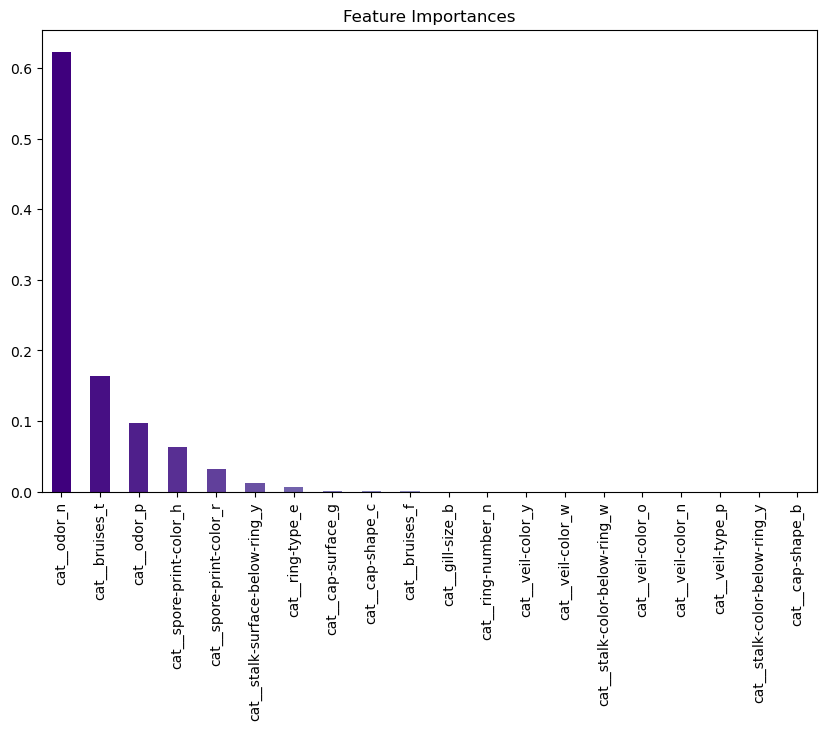

Press 1 to save fig a


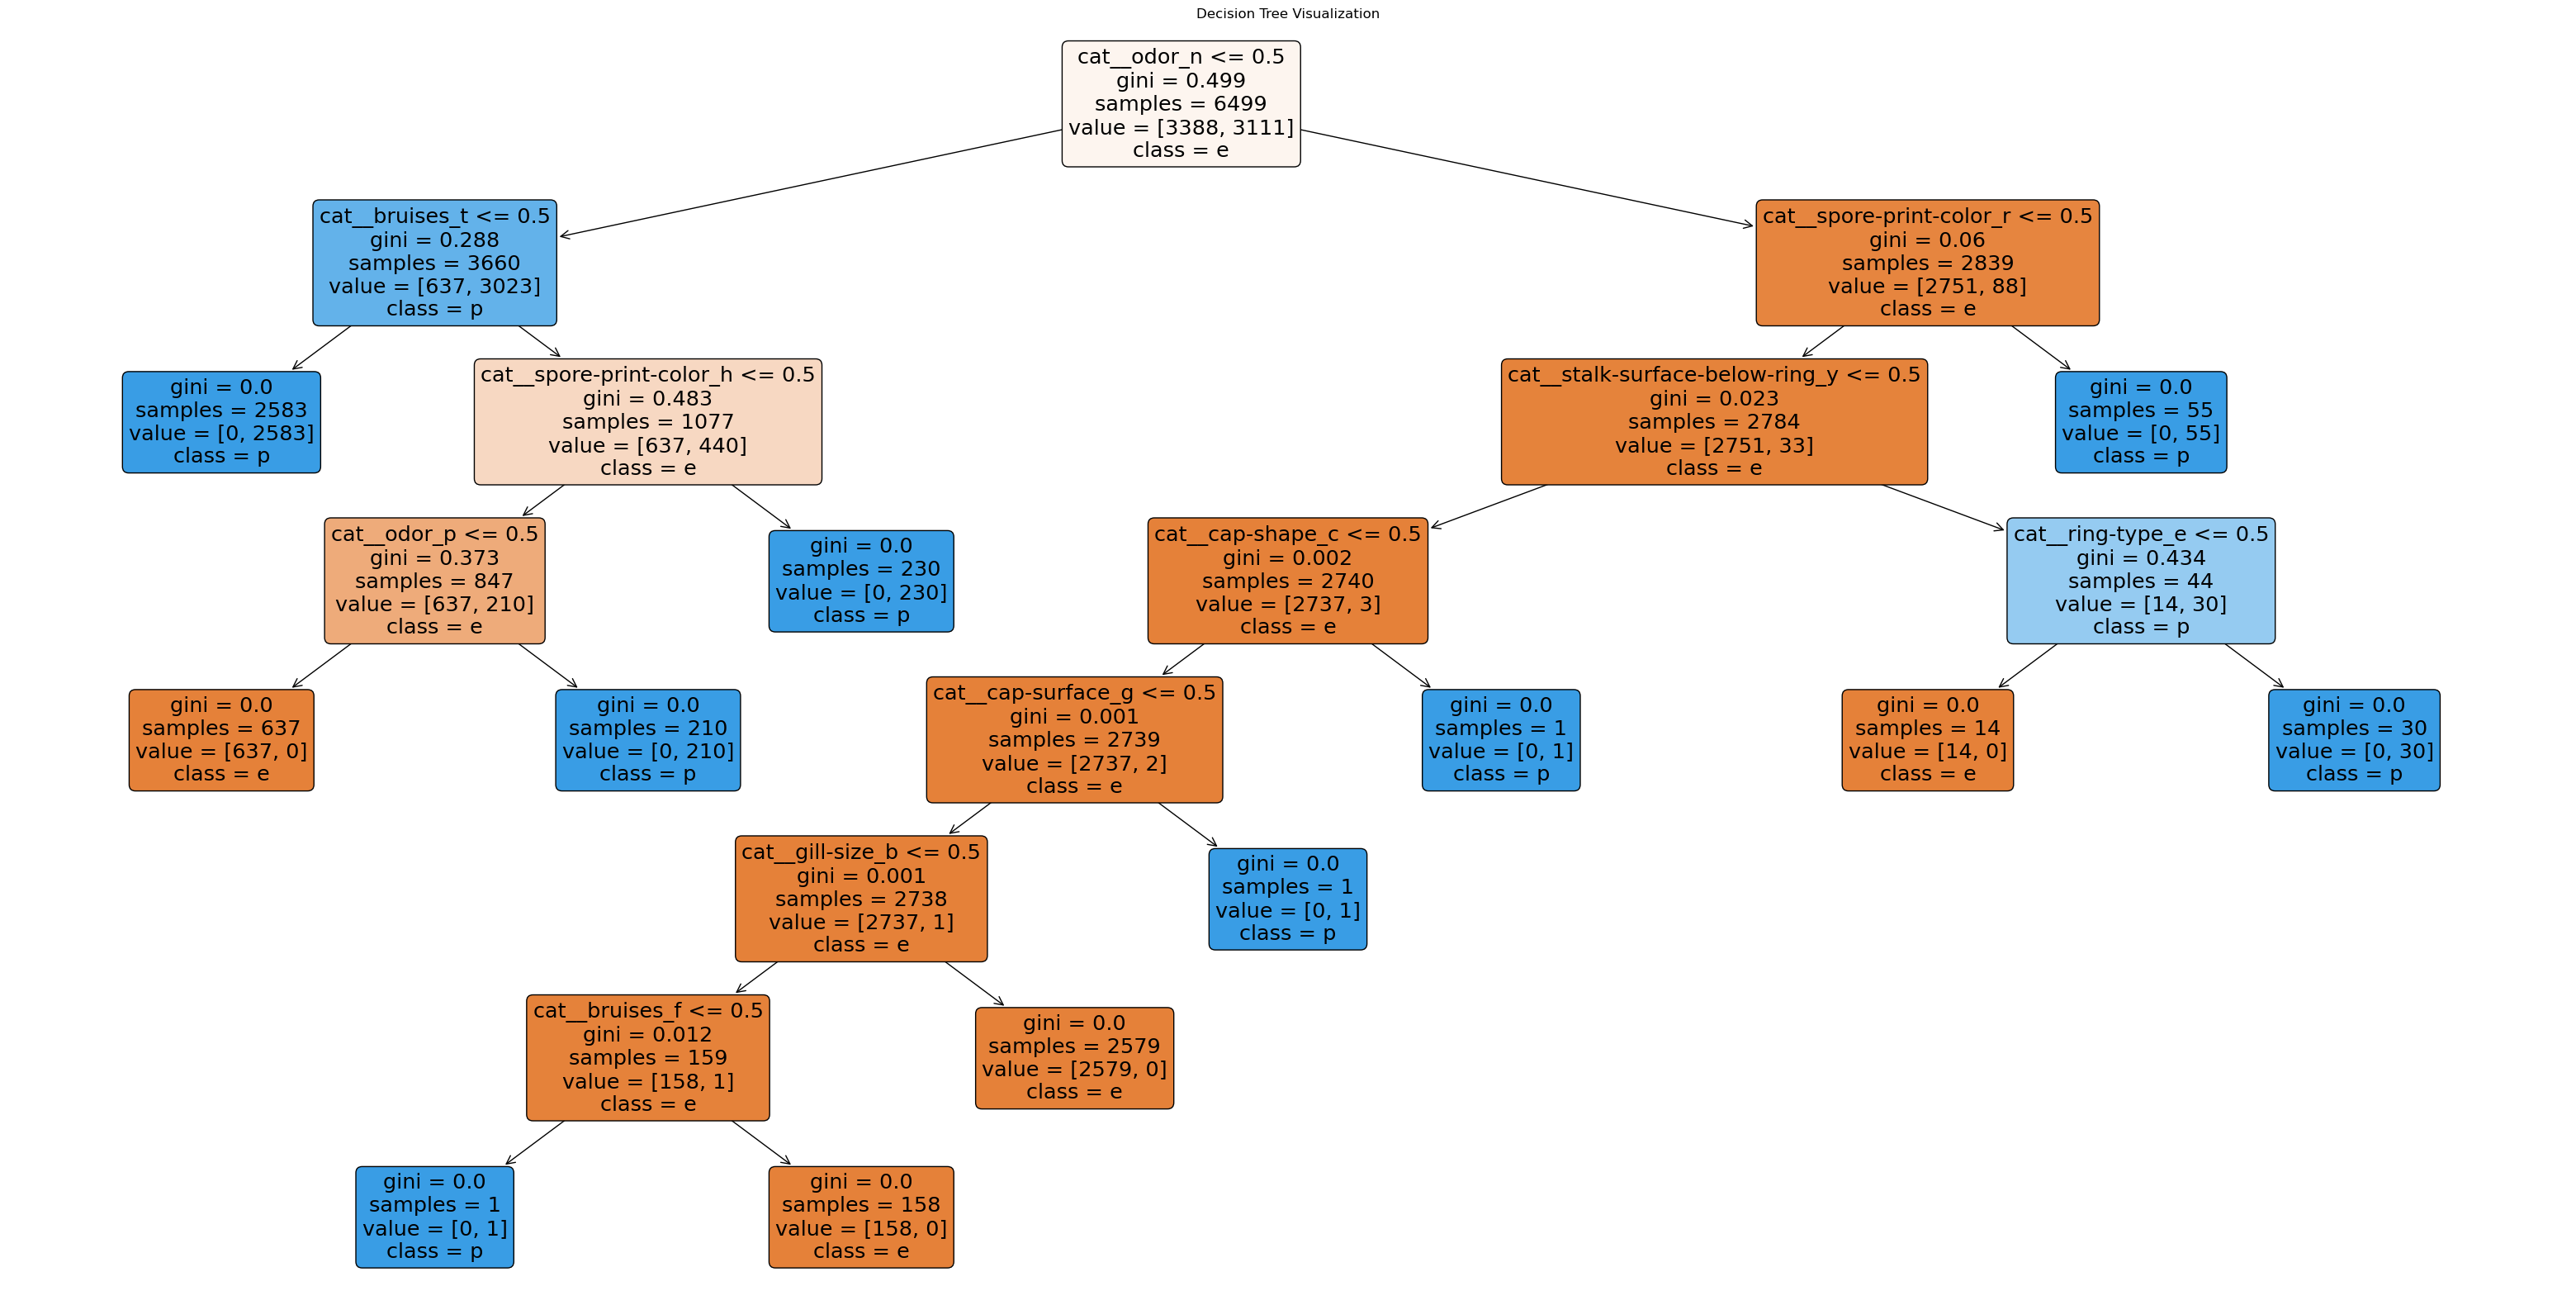

In [16]:
pipe.get_feature_importance()

pipe.visualize_decision_tree()

In [18]:
ht = mlht(model=my_model, pipeline=pipe, cores=2)

In [20]:
ht.run_tuning()

Current model parameters:

1. ccp_alpha: 0.0
2. class_weight: None
3. criterion: gini
4. max_depth: None
5. max_features: None
6. max_leaf_nodes: None
7. min_impurity_decrease: 0.0
8. min_samples_leaf: 1
9. min_samples_split: 2
10. min_weight_fraction_leaf: 0.0
11. random_state: None
12. splitter: best



Enter the parameter you'd like to tune (or type 'done' to finish):  max_depth
Enter new values for 'max_depth' (comma-separated if multiple):  3,5,7,9

Enter the parameter you'd like to tune (or type 'done' to finish):  criterion
Enter new values for 'criterion' (comma-separated if multiple):  'gini','entropy'

Enter the parameter you'd like to tune (or type 'done' to finish):  done



The parameters being tested for best tuning are: 

max_depth: [3, 5, 7, 9]
criterion: ['gini', 'entropy']
Fitting 10 folds for each of 8 candidates, totalling 80 fits

The best estimator for DecisionTreeClassifier() is: 
DecisionTreeClassifier(max_depth=7)

The best score with that estimator is: 
0.9998461538461537

The best parameters after tuning are : 
{'criterion': 'gini', 'max_depth': 7}
Tuning done! You can now access the object for the tuned model(.tuned_model) or retune for a different model.


In [22]:
tm = ht.tuned_model

In [24]:
tm

DecisionTreeClassifier(max_depth=7)